# Klasifikasi Jenis Kopra dengan Konsep Machine Learning dan Ensembel Learning

Kontribusi Riset
- Pembagian data = 80% dan 20%, 90% dan 10%
- Ektrasi Fitur = Warna, Bentuk, Tesktur
- Metode Klasifikasi = KNN, SVM, DT, RF, NB, LR, LDA, QDA
- Metode Ensambel Learning = Votting, Bagging, Stacking, AdaBoost

In [1]:
# library untuk manipulasi data
import pandas as pd
import numpy as np

# library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk praproses data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# library untuk model klasifikasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# library untuk model ensambel
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# library untuk evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

## 1. Akuisisi Data

In [2]:
# load dataset
dataset = pd.read_csv("dataset/ekstrasi-fitur-kopra-nonTelungkup.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean-R           1839 non-null   float64
 1   Mean-G           1839 non-null   float64
 2   Mean-B           1839 non-null   float64
 3   Mean-H           1839 non-null   float64
 4   Mean-V           1839 non-null   float64
 5   Mean-S           1839 non-null   float64
 6   Mean-Gray        1839 non-null   float64
 7   Standar-Deviasi  1839 non-null   float64
 8   Luas             1839 non-null   float64
 9   Perimeter        1839 non-null   float64
 10  Contrast         1839 non-null   float64
 11  Dissimilarity    1839 non-null   float64
 12  Homogeneity      1839 non-null   float64
 13  Energy           1839 non-null   float64
 14  Correlation      1839 non-null   float64
 15  Jenis Kopra      1839 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 230.0 KB


In [4]:
dataset.describe()

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-S,Mean-Gray,Standar-Deviasi,Luas,Perimeter,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis Kopra
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000
mean,81.020750,67.117666,50.377857,12.739430,81.093483,68.252834,69.369837,52.684988,8136.767809,701.574270,69.925258,4.203152,0.466596,0.259594,0.986388,2.000000
std,17.575378,17.593451,14.514701,6.930784,17.569546,17.446976,16.825835,9.524066,13011.715408,667.754673,34.695929,1.249612,0.056876,0.042660,0.008067,0.816719
min,30.556322,19.653977,15.734759,3.153138,30.572092,19.010904,22.464092,20.503420,0.000000,0.000000,21.938480,2.146624,0.307204,0.171859,0.920092,1.000000
25%,68.835589,54.415539,39.790509,9.300176,68.854501,56.029231,57.338926,46.351015,562.500000,230.450791,47.153494,3.302342,0.425960,0.233576,0.983497,1.000000
50%,80.388866,66.794438,50.359408,12.087998,80.399455,67.305323,68.924920,52.591468,2964.000000,598.641696,58.921316,3.889533,0.466074,0.250399,0.988635,2.000000
75%,93.768829,79.335187,59.820183,15.001382,93.801085,78.947500,80.964257,58.842228,10970.000000,921.962545,83.403973,4.854590,0.507364,0.271685,0.992103,3.000000
max,134.861606,121.998932,99.756737,100.330030,134.863778,128.910255,123.295228,90.835493,171997.000000,6054.448492,330.264746,10.858529,0.651113,0.552925,0.996380,3.000000


In [5]:
np.round(dataset, 1)

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-S,Mean-Gray,Standar-Deviasi,Luas,Perimeter,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis Kopra
0,99.8,85.3,72.6,11.3,99.8,51.0,88.2,54.6,7933.5,2053.3,43.4,3.3,0.5,0.2,1.0,1
1,114.2,110.4,91.1,19.0,114.8,36.9,109.4,79.9,33489.0,1334.8,68.7,4.1,0.5,0.3,1.0,1
2,86.8,77.1,58.2,14.4,86.8,58.8,77.8,52.1,1958.5,573.9,37.7,2.9,0.5,0.2,1.0,1
3,80.4,71.2,55.9,12.9,80.4,52.6,72.2,52.3,2908.0,863.0,34.5,2.6,0.6,0.3,1.0,1
4,99.0,89.0,68.0,14.4,99.0,56.0,89.6,63.8,31867.5,706.1,51.5,3.1,0.5,0.3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,65.7,53.9,38.5,13.2,65.7,78.2,55.6,38.1,274.5,94.8,56.0,3.6,0.4,0.2,1.0,3
1835,56.1,52.1,39.0,20.3,57.7,63.3,51.8,35.7,513.0,153.8,88.0,5.2,0.4,0.2,1.0,3
1836,57.4,46.5,29.4,12.4,57.4,83.3,47.8,37.3,150.0,172.9,76.8,4.5,0.4,0.3,1.0,3
1837,66.6,58.9,41.1,15.0,66.6,68.8,59.2,41.0,342.0,171.1,68.5,4.4,0.4,0.2,1.0,3


## 2. Eksplorasi Data Analisis

In [6]:
np.round(dataset.corr(method="pearson"), 2)

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-S,Mean-Gray,Standar-Deviasi,Luas,Perimeter,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis Kopra
Mean-R,1.00,0.92,0.84,0.05,1.00,-0.06,0.96,0.89,0.65,0.53,0.08,-0.02,-0.01,-0.44,0.51,-0.50
Mean-G,0.92,1.00,0.93,0.23,0.92,-0.33,0.99,0.86,0.66,0.52,0.03,-0.05,-0.00,-0.44,0.53,-0.52
Mean-B,0.84,0.93,1.00,0.24,0.84,-0.57,0.93,0.80,0.56,0.40,-0.12,-0.20,0.11,-0.44,0.61,-0.59
Mean-H,0.05,0.23,0.24,1.00,0.06,-0.30,0.18,0.06,0.12,0.09,0.03,0.04,-0.09,-0.18,0.02,-0.07
Mean-V,1.00,0.92,0.84,0.06,1.00,-0.06,0.96,0.89,0.65,0.54,0.08,-0.02,-0.01,-0.44,0.51,-0.50
Mean-S,-0.06,-0.33,-0.57,-0.30,-0.06,1.00,-0.28,-0.19,-0.08,0.04,0.36,0.38,-0.34,-0.02,-0.43,0.36
Mean-Gray,0.96,0.99,0.93,0.18,0.96,-0.28,1.00,0.89,0.66,0.53,0.03,-0.06,0.01,-0.45,0.55,-0.53
Standar-Deviasi,0.89,0.86,0.80,0.06,0.89,-0.19,0.89,1.00,0.66,0.56,0.18,0.06,0.02,-0.13,0.51,-0.31
Luas,0.65,0.66,0.56,0.12,0.65,-0.08,0.66,0.66,1.00,0.59,0.21,0.14,-0.07,-0.13,0.24,-0.14
Perimeter,0.53,0.52,0.40,0.09,0.54,0.04,0.53,0.56,0.59,1.00,0.37,0.31,-0.20,-0.11,0.13,-0.04


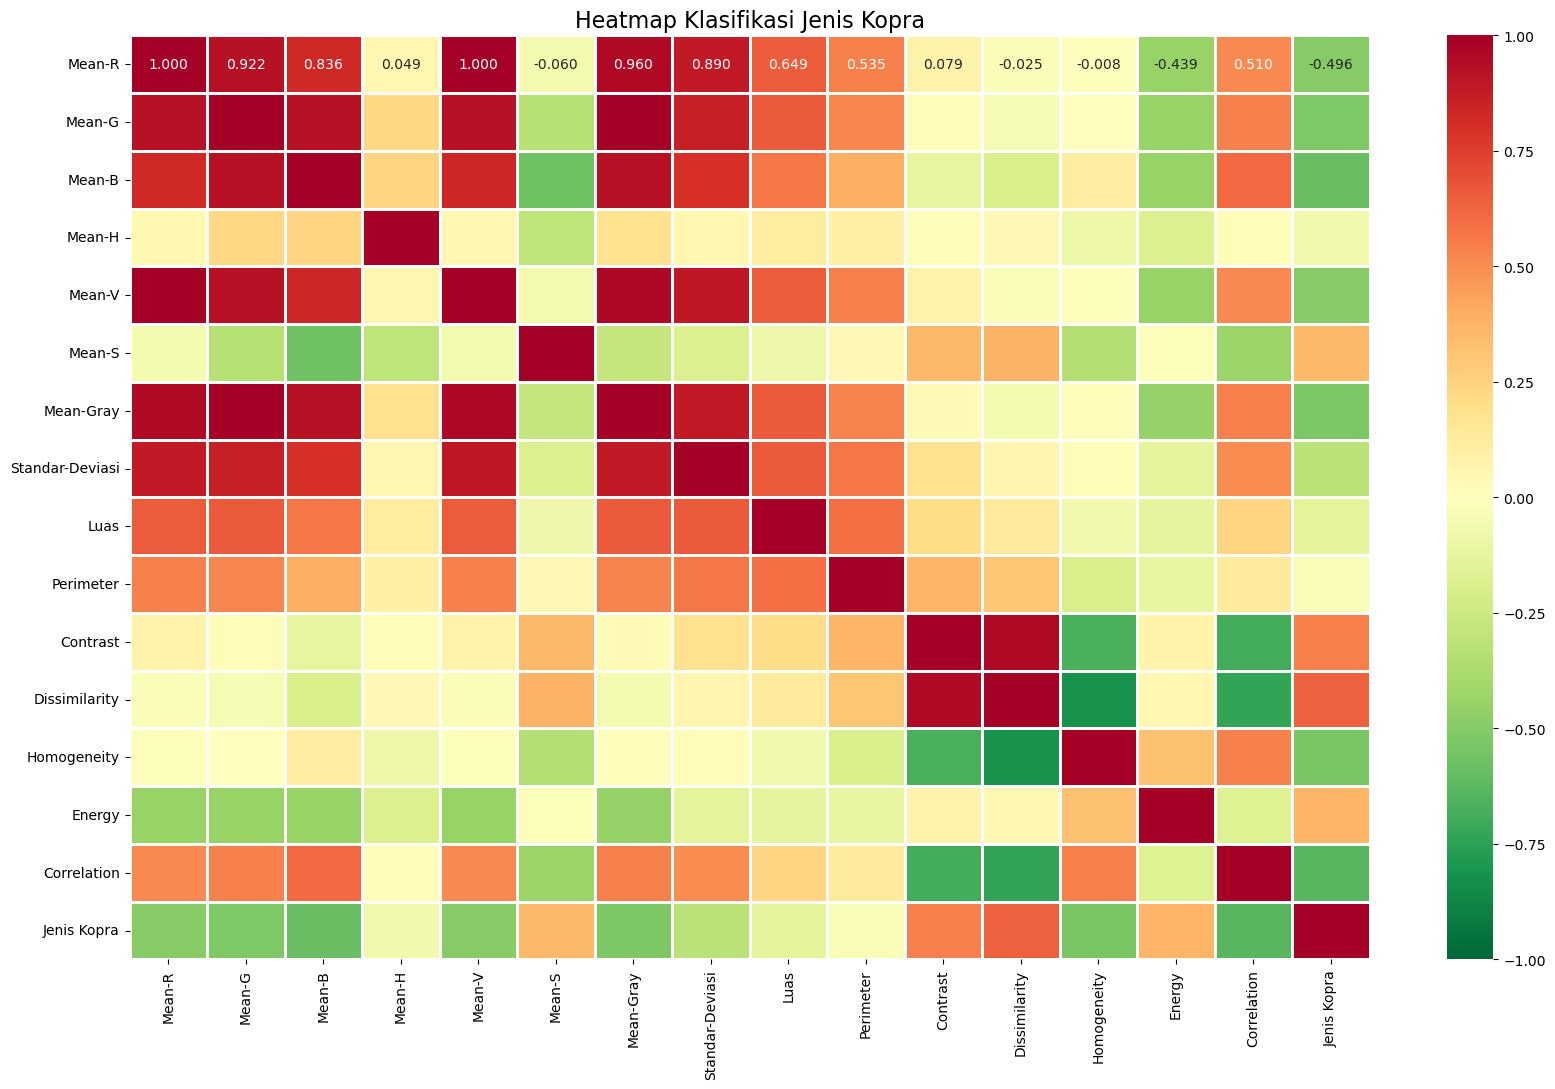

In [7]:
# membuat perhitungan korelasi terlebih dahulu
df_corr = dataset.corr(method="pearson")

# membuat frame heatmap
fig,ax = plt.subplots(figsize=(20,12))

# proses visual heatmap
# => pilihan warna lain untuk visual heatmap (coolwarm, Blues, RdYlGn_r, viridis, YlGnBu)
sns.heatmap(df_corr, cmap="RdYlGn_r", vmax=1, vmin=-1, annot=True, linewidths=1, fmt='.3f', ax=ax)

# membuat title atau judul
plt.title("Heatmap Klasifikasi Jenis Kopra", fontsize=16)

# Menampilkan hasil visualisasi
plt.show()

## 3. Praproses Data

- Setting experiment

In [8]:
# 1. skenario W
# print("Percobaan 1")
# x = dataset.iloc[:,0:8].values

# # 2. skenario B
# print("Percobaan 2")
# x = dataset.iloc[:,8:10].values

# # 3. skenario T
# print("Percobaan 3")
# x = dataset.iloc[:,10:15].values

# # 4. Skenario W dan B
# print("Percobaan 4")
# x = dataset.iloc[:,0:10].values

# # 5. Skenario W dan T
# print("Percobaan 5")
# x = dataset.iloc[:,0:13].values

# # 6. Skenario B dan T
# print("Percobaan 6")
# x = dataset.iloc[:,8:15].values

# 7. Skenario W,B,dan T
print("Percobaan 7")
x = dataset.iloc[:,0:15].values

# Taget, Jenis Kopra
y = dataset.iloc[:,[-1]].values
y = y.reshape(len(y))

Percobaan 7


In [9]:
# feature
np.round(x[:5],4)

array([[9.9773500e+01, 8.5299300e+01, 7.2579300e+01, 1.1272000e+01,
        9.9790600e+01, 5.1024400e+01, 8.8194400e+01, 5.4589300e+01,
        7.9335000e+03, 2.0533048e+03, 4.3446600e+01, 3.3410000e+00,
        4.8200000e-01, 2.2820000e-01, 9.9270000e-01],
       [1.1416270e+02, 1.1042490e+02, 9.1145800e+01, 1.9004400e+01,
        1.1482820e+02, 3.6871800e+01, 1.0935810e+02, 7.9939300e+01,
        3.3489000e+04, 1.3348469e+03, 6.8707300e+01, 4.1415000e+00,
        4.7370000e-01, 2.7630000e-01, 9.9460000e-01],
       [8.6758700e+01, 7.7095800e+01, 5.8220200e+01, 1.4373900e+01,
        8.6760400e+01, 5.8789900e+01, 7.7833500e+01, 5.2085100e+01,
        1.9585000e+03, 5.7385490e+02, 3.7735000e+01, 2.9174000e+00,
        5.2210000e-01, 2.3550000e-01, 9.9300000e-01],
       [8.0397600e+01, 7.1179400e+01, 5.5914600e+01, 1.2919400e+01,
        8.0399500e+01, 5.2578400e+01, 7.2236500e+01, 5.2309300e+01,
        2.9080000e+03, 8.6297470e+02, 3.4472300e+01, 2.6061000e+00,
        5.6490000e-01,

In [10]:
# label
np.round(y[:-1])

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

- Normalisasi MinMax

In [11]:
# normalize features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [12]:
np.round(x[:5],4)

array([[0.6636, 0.6414, 0.6765, 0.0835, 0.6637, 0.2913, 0.6519, 0.4846,
        0.0461, 0.3391, 0.0698, 0.1371, 0.5084, 0.1479, 0.9514],
       [0.8016, 0.8869, 0.8975, 0.1631, 0.8079, 0.1625, 0.8618, 0.8451,
        0.1947, 0.2205, 0.1517, 0.229 , 0.484 , 0.2742, 0.9767],
       [0.5388, 0.5613, 0.5056, 0.1155, 0.5388, 0.362 , 0.5491, 0.449 ,
        0.0114, 0.0948, 0.0512, 0.0885, 0.625 , 0.1671, 0.9557],
       [0.4778, 0.5034, 0.4782, 0.1005, 0.4778, 0.3054, 0.4936, 0.4522,
        0.0169, 0.1425, 0.0407, 0.0527, 0.7493, 0.2417, 0.9645],
       [0.6558, 0.678 , 0.6223, 0.1154, 0.6558, 0.3368, 0.6662, 0.615 ,
        0.1853, 0.1166, 0.0959, 0.1046, 0.6785, 0.225 , 0.964 ]])

- Split Data Testing dan Data Training

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, train_size=0.9, random_state=0)

In [14]:
temp_x = pd.DataFrame(np.round(x_test,3))

In [15]:
temp_y = pd.DataFrame(np.round(y_test,3))

In [16]:
temp = pd.concat([temp_x, temp_y], axis=1)

In [17]:
temp.to_csv("feature_scaling.csv", index=False)

## 4. Konsep Supervised Learning

In [18]:
# 1. KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1, metric='euclidean').fit(x_train,y_train).predict(x_test)

# 2. SVM
svm = SVC(kernel='rbf', random_state=1234).fit(x_train,y_train).predict(x_test)

# 3. C45
c45 = DecisionTreeClassifier(criterion="gini", random_state=1234).fit(x_train,y_train).predict(x_test)

# 4. NB
nb = GaussianNB().fit(x_train,y_train).predict(x_test)

# 5. LR
lr = LogisticRegression(random_state=1234).fit(x_train, y_train).predict(x_test)

# 6. LDA
lda = LinearDiscriminantAnalysis().fit(x_train,y_train).predict(x_test)

# 7. LDQ
ldq = QuadraticDiscriminantAnalysis().fit(x_train,y_train).predict(x_test)

In [19]:
hasil = pd.DataFrame({
    "K Nearest-Neighbor": knn,
    "Suport Vector Machine": svm,
    "Decision Tree": c45,
    "Naive Bayes": nb,
    "Logistic Regresi": lr,
    "Linear Discriminant Analysis": lda,
    "Quadratic Discriminant Analysis": ldq,
    "Target": y_test
})

In [20]:
print("Supervised Learning")
print("------------------- \n")
for i in range(len(hasil.columns)-1):
    print(hasil.columns[i])
    print(np.round(accuracy_score(hasil["Target"], hasil.iloc[:,i:i+1]), 4))
    print(np.round(precision_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(recall_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(f1_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print("------------------------- \n")

Supervised Learning
------------------- 

K Nearest-Neighbor
0.8424
0.8409
0.8365
0.837
------------------------- 

Suport Vector Machine
0.8424
0.8358
0.836
0.8359
------------------------- 

Decision Tree
0.7989
0.7928
0.7936
0.7931
------------------------- 

Naive Bayes
0.7989
0.7954
0.7903
0.7914
------------------------- 

Logistic Regresi
0.8207
0.8129
0.8139
0.813
------------------------- 

Linear Discriminant Analysis
0.8043
0.8032
0.8001
0.8008
------------------------- 

Quadratic Discriminant Analysis
0.8315
0.8276
0.8224
0.8232
------------------------- 



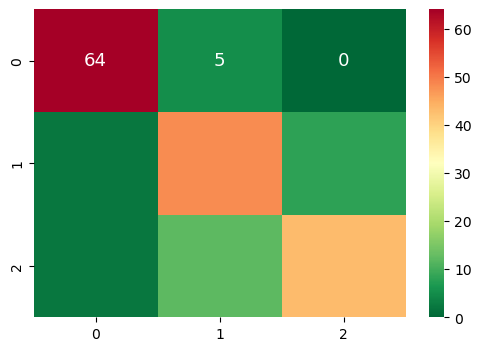

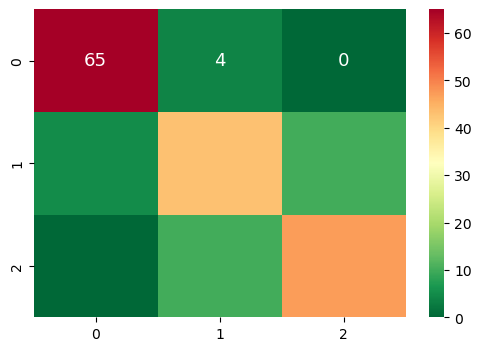

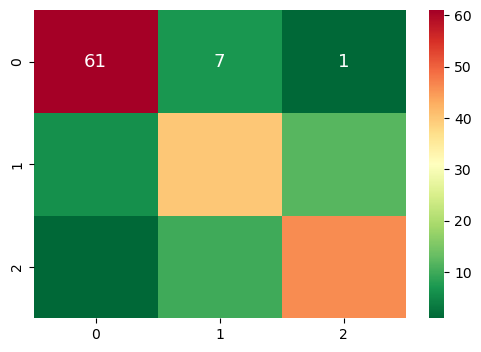

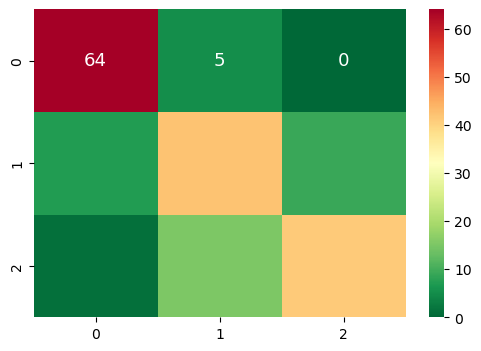

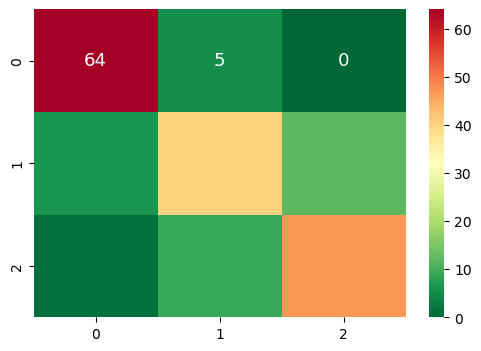

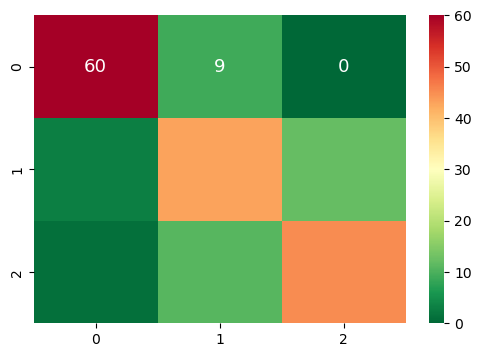

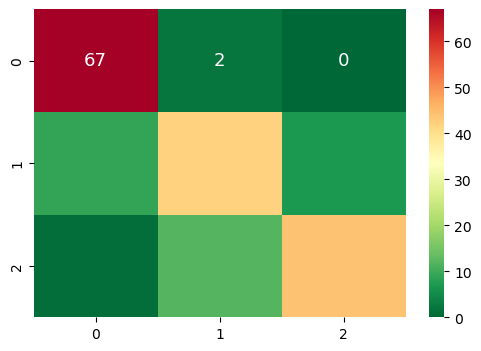

In [21]:
for i in range(len(hasil.columns)-1):
    fig,ax = plt.subplots(figsize=(6,4))
    sns.heatmap(confusion_matrix(hasil["Target"], hasil.iloc[:,i:i+1]),annot=True, annot_kws={"size": 13}, cmap="RdYlGn_r")
    #plt.title(hasil.columns[i], fontsize=12)
    plt.show()

## 5. Ensambel Learning Classifier

### 5.1 Multi Base Model

In [22]:
# Algoritma supervised learning
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1, metric='euclidean')),
    ('svm', SVC(kernel='rbf', random_state=1234, probability=True)),
    ('dt', DecisionTreeClassifier(criterion="gini", random_state=1234)),
    ('nb', GaussianNB()),
    ('lr', LogisticRegression(max_iter=200, random_state=1234)),
    # ('lda', LinearDiscriminantAnalysis()),
    # ('ldq', QuadraticDiscriminantAnalysis())
]

In [23]:
# Algoritma ensembel learning
# 1. Voting
voting = VotingClassifier(estimators=estimators, voting='soft').fit(x_train, y_train).predict(x_test)
# 2. Stacking
stacking = StackingClassifier(estimators=estimators,stack_method='predict').fit(x_train, y_train).predict(x_test)

In [24]:
# hasil prediksi ensembel
hasil = pd.DataFrame({
    "Voting": voting,
    "Stacking": stacking,
    "Target": y_test
})

In [25]:
for i in range(len(hasil.columns)-1):
    print(hasil.columns[i])
    print(np.round(accuracy_score(hasil["Target"], hasil.iloc[:,i:i+1]), 4))
    print(np.round(precision_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(recall_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(f1_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print("------------------------- \n")

Voting
0.8641
0.8599
0.8579
0.8582
------------------------- 

Stacking
0.8533
0.8499
0.8483
0.8486
------------------------- 



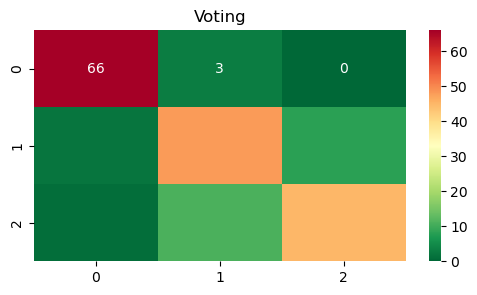

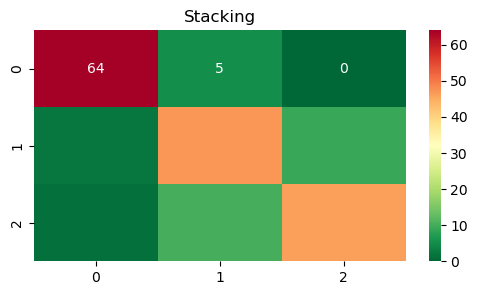

In [26]:
for i in range(len(hasil.columns)-1):
    fig,ax = plt.subplots(figsize=(6,3))
    sns.heatmap(confusion_matrix(hasil["Target"], hasil.iloc[:,i:i+1]),annot=True, cmap="RdYlGn_r")
    plt.title(hasil.columns[i], fontsize=12)
    plt.show()

### 5.2 Ensembel Bagging 

In [27]:
# Algoritma supervised learning
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1, metric='euclidean')
svm = SVC(kernel='rbf', random_state=1234, probability=True)
dt = DecisionTreeClassifier(criterion="gini", random_state=1234)
gnb = GaussianNB()
lr = LogisticRegression(max_iter=200, random_state=1234)
lda =LinearDiscriminantAnalysis()
ldq = QuadraticDiscriminantAnalysis()

In [28]:
# Algoritma ensembel learning
knn_bagging = BaggingClassifier(estimator=knn, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [29]:
svm_bagging = BaggingClassifier(estimator=svm, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [30]:
dt_bagging = BaggingClassifier(estimator=dt, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [31]:
gnb_bagging = BaggingClassifier(estimator=gnb, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [32]:
lr_bagging = BaggingClassifier(estimator=lr, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [33]:
lda_bagging = BaggingClassifier(estimator=lda, n_estimators=50, random_state=7).fit(x_train, y_train).predict(x_test)

In [34]:
ldq_bagging = BaggingClassifier(estimator=ldq, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [35]:
# hasil prediksi ensembel
hasil = pd.DataFrame({
    "knn": knn_bagging,
    "svm": svm_bagging,
    "dt": dt_bagging,
    "gnb": gnb_bagging,
    "lr": lr_bagging,
    "lda": lda_bagging,
    "ldq": ldq_bagging,
    "Target": y_test
})

In [36]:
print("Ensambel Bagging")
print("----------------\n")
for i in range(len(hasil.columns)-1):
    print(hasil.columns[i])
    print(np.round(accuracy_score(hasil["Target"], hasil.iloc[:,i:i+1]), 4))
    print(np.round(precision_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(recall_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(f1_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print("------------------------- \n")

Ensambel Bagging
----------------

knn
0.8424
0.8432
0.8364
0.8369
------------------------- 

svm
0.837
0.8296
0.8302
0.8298
------------------------- 

dt
0.8913
0.8867
0.8871
0.8869
------------------------- 

gnb
0.7989
0.7954
0.7903
0.7914
------------------------- 

lr
0.8207
0.8129
0.8139
0.813
------------------------- 

lda
0.8043
0.8032
0.8001
0.8008
------------------------- 

ldq
0.8315
0.8279
0.8234
0.8243
------------------------- 



### 5.3 Ensembel Boosting

In [37]:
# best recom random state
# svm = 0, 100
# dt = 0, 7, 42, 1234, 100
# gnb = 0, 7, 42, 1234, 100
# lr = 0, 7, 42, 1234, 100

In [38]:
# # Algoritma ensembel learning
# knn_boosting = AdaBoostClassifier(estimator=knn, n_estimators=50, random_state=0).fit(x_train, y_train).predict(x_test)

In [39]:
# svm_boosting = AdaBoostClassifier(estimator=svm, n_estimators=50, random_state=0).fit(x_train, y_train).predict(x_test)

In [40]:
# dt_boosting = AdaBoostClassifier(estimator=dt, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [41]:
# gnb_boosting = AdaBoostClassifier(estimator=gnb, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [42]:
# lr_boosting = AdaBoostClassifier(estimator=lr, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [43]:
# lda_boosting = AdaBoostClassifier(estimator=lda, n_estimators=50, random_state=1234).fit(x_train, y_train).predict(x_test)

In [44]:
# ldq_boosting = AdaBoostClassifier(estimator=ldq, n_estimators=50, random_state=0).fit(x_train, y_train).predict(x_test)

In [45]:
# # hasil prediksi ensembel
# hasil = pd.DataFrame({
#     # "knn": knn_boosting,
#     "svm": svm_boosting,
#     "dt": dt_boosting,
#     "gnb": gnb_boosting,
#     "lr": lr_boosting,
#     # "lda": lda_boosting,
#     # "ldq": lqa_boosting,
#     "Target": y_test
# })

In [46]:
# print("Ensambel Boosting")
# for i in range(len(hasil.columns)-1):
#     print(hasil.columns[i])
#     print(np.round(accuracy_score(hasil["Target"], hasil.iloc[:,i:i+1]), 4))
#     print(np.round(precision_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
#     print(np.round(recall_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
#     print(np.round(f1_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
#     print("------------------------- \n")